# 청소년 데이터 빈도 분석

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('DS/text_data_mining/textdata4-1.csv', encoding = 'utf-8')
df.head(10)

,contents,result
0,처음에는 사람들이 우리 같은 사람들에게 왜 편견을 갖는지 이해를 못했\n거든요. 그...,1
1,다른 사람에게 피해주지 않고 제 본분을 잃지 않고 살 수 있는 데에는\n일단 종교가...,1
2,집에 가면 항상 집에서 영화나 다큐멘터리 같은 거 봐요. 위인 있는 동\n영상 보면...,1
3,대학학비 마련이 남아있는데 지금하고 있는 일만으로는 어려울 것 같아\n요. 알바 하...,1
4,일을 해야 하니까 학교 그만둔 걸 숨길 수 없잖아요. 오히려 그것 땜에\n불이익을 ...,1
5,"군인, 경찰, 소방관 뭐 이런 쪽이었어요. 중학교 때까지 유도선수로 뛰었\n기 때문...",1
6,지금까지 학교 그만둔 걸 후회해 본 적이 없었는데 작년에 딱 한 번 복\n교를 생각...,1
7,학교를 그만 둔 아이들 셋과 거의 매일 산책을 하는데 깊은 이야기는 안\n해요. 답...,0
8,"공부는 이틀 해봤고, 아르바이트는 나이 제한 때문에 안 된다는 것 알고,\n식구들 ...",0
9,좋은 대학이야 갈 수 있으면 좋지요. 그래도 그렇게 신경 쓰지는 않아요.\n집에서도...,0


In [6]:
df2 = df.sort_values(by='result', ascending=True) 
df2.to_csv('DS/textdata00.csv', encoding='cp949')

In [7]:
from konlpy.tag import Okt
twitter = Okt()

def tokenize(text):
    stems = []
    tagged = twitter.pos(text)
    for i in range(0, len(tagged)):
        if (tagged[i][1] == 'Noun' or tagged[i][1] == 'Adjective' or tagged[i][1] == 'Verb'):
            stems.append(tagged[i][0])
    return stems

tagged = twitter.pos(df['contents'][0])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_data_list = df['contents'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='')
text_data = vectorizer.fit_transform(text_data_arr)

In [9]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf.head()

,가,가게,가고,가기,가끔,가는,가라앉을,가려고,가면,가서,...,후회,흐,희망,힘,힘든,힘들,힘들게,힘들고,힘들어,힘들지만
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225422,0.0,...,0.0,0.0,0.0,0.0,0.225422,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
df_tfidf.to_csv('DS/vectorizer_textdata4-1-1.csv', encoding='cp949')

C:\Users\YC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\YC\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


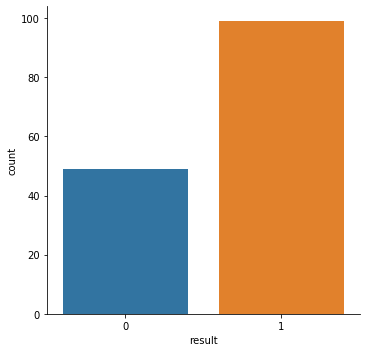

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot('result', data=df, kind='count', size=5)
g.set_xlabels()

## 분류

In [12]:
#리스트로 변경
contents_data = df['contents'].astype(str).tolist()
contents_label = df['result'].astype(str).tolist()

#데이터 셋 분할
trainset_size = int(round(len(contents_data)*0.70))

x_train = np.array([''.join(data) for data in contents_data[0:trainset_size]])
y_train = np.array([data for data in contents_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in contents_data[trainset_size+1:len(contents_data)]])
y_test = np.array([data for data in contents_label[trainset_size+1:len(contents_label)]])

#문서 단어행렬 생성
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [13]:
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


In [14]:
#성능 평가 패키지
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 0 16]
 [ 0 27]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.63      1.00      0.77        27

    accuracy                           0.63        43
   macro avg       0.31      0.50      0.39        43
weighted avg       0.39      0.63      0.48        43


 Accuracy 

0.63


C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

C:\Users\YC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63


### Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

nb_classifier = DecisionTreeClassifier().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 7  9]
 [ 8 19]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.68      0.70      0.69        27

    accuracy                           0.60        43
   macro avg       0.57      0.57      0.57        43
weighted avg       0.60      0.60      0.60        43


 Accuracy 

0.6


In [18]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decision Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63
1,Decision Tree,0.60,0.60


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

nb_classifier = RandomForestClassifier().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 8  8]
 [ 2 25]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.76      0.93      0.83        27

    accuracy                           0.77        43
   macro avg       0.78      0.71      0.72        43
weighted avg       0.77      0.77      0.75        43


 Accuracy 

0.77


C:\Users\YC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63
1,Decision Tree,0.60,0.60
2,Random Forest,0.75,0.77


### SVM

In [21]:
from sklearn.svm import LinearSVC

nb_classifier = LinearSVC().fit(X_train, y_train)
nb_pre = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pre))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pre))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pre, normalize=True), 2))


 Confusion Matrix 

[[ 6 10]
 [ 1 26]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.38      0.52        16
           1       0.72      0.96      0.83        27

    accuracy                           0.74        43
   macro avg       0.79      0.67      0.67        43
weighted avg       0.77      0.74      0.71        43


 Accuracy 

0.74


In [22]:
fm = round(f1_score(y_test, nb_pre, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pre, normalize=True), 2)
df_per.loc[len(df_per)] = ['SVM', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63
1,Decision Tree,0.60,0.60
2,Random Forest,0.75,0.77
3,SVM,0.71,0.74


#### 성능비교

In [23]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.48,0.63
Decision Tree,0.60,0.60
Random Forest,0.75,0.77
SVM,0.71,0.74


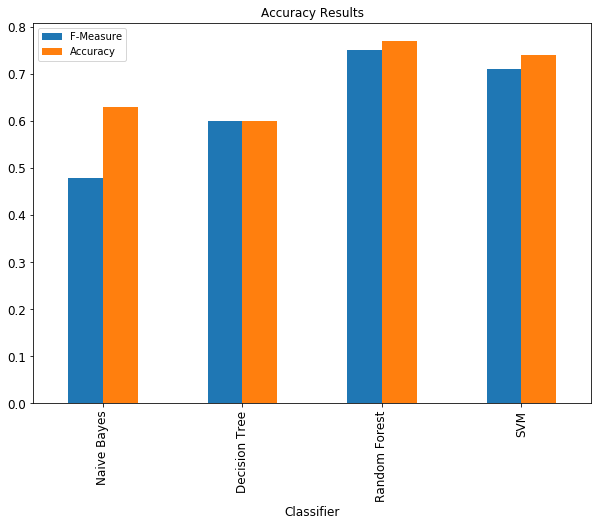

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = df_per_1[['F-Measure', 'Accuracy']].plot(kind='bar', title='Accuracy Results',
                                             figsize=(10,7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()